In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [60]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv",encoding='unicode_escape')
df
#print(df.to_string())

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000
...,...,...,...,...,...,...,...,...,...,...
111433,Reimports,2021,11/12/2021,Saturday,All,All,All,$,0,165000000
111434,Reimports,2021,12/12/2021,Sunday,All,All,All,$,0,165000000
111435,Reimports,2021,13/12/2021,Monday,All,All,All,$,2000000,166000000
111436,Reimports,2021,14/12/2021,Tuesday,All,All,All,$,1000000,167000000


In [8]:
df.shape

(111438, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111438 entries, 0 to 111437
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Direction       111438 non-null  object
 1   Year            111438 non-null  int64 
 2   Date            111438 non-null  object
 3   Weekday         111438 non-null  object
 4   Country         111438 non-null  object
 5   Commodity       111438 non-null  object
 6   Transport_Mode  111438 non-null  object
 7   Measure         111438 non-null  object
 8   Value           111438 non-null  int64 
 9   Cumulative      111438 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 8.5+ MB


In [10]:
df.describe()

,Year,Value,Cumulative
count,111438.000000,1.114380e+05,1.114380e+05
mean,2017.982430,2.905750e+07,5.174254e+09
std,1.992352,5.267248e+07,9.765606e+09
min,2015.000000,0.000000e+00,0.000000e+00
25%,2016.000000,1.000000e+06,1.140000e+08
50%,2018.000000,8.000000e+06,1.420000e+09
75%,2020.000000,2.800000e+07,4.797000e+09
max,2021.000000,5.490000e+08,6.718000e+10


In [13]:
df[['Value','Cumulative']].describe()

,Value,Cumulative
count,1.114380e+05,1.114380e+05
mean,2.905750e+07,5.174254e+09
std,5.267248e+07,9.765606e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+06,1.140000e+08
50%,8.000000e+06,1.420000e+09
75%,2.800000e+07,4.797000e+09
max,5.490000e+08,6.718000e+10


In [14]:
df.isnull().sum()

Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

In [15]:
df.rename(columns={'Weekday':'Day'})

,Direction,Year,Date,Day,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000
...,...,...,...,...,...,...,...,...,...,...
111433,Reimports,2021,11/12/2021,Saturday,All,All,All,$,0,165000000
111434,Reimports,2021,12/12/2021,Sunday,All,All,All,$,0,165000000
111435,Reimports,2021,13/12/2021,Monday,All,All,All,$,2000000,166000000
111436,Reimports,2021,14/12/2021,Tuesday,All,All,All,$,1000000,167000000


# DATA VISUALIZATIONS

# Year

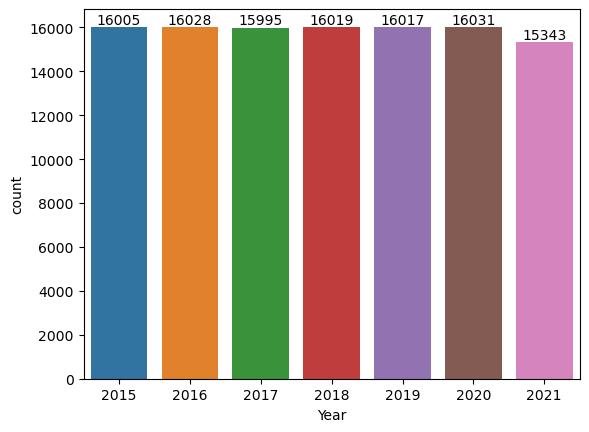

In [19]:
ax=sns.countplot(x='Year',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

# groupby between weekday and value

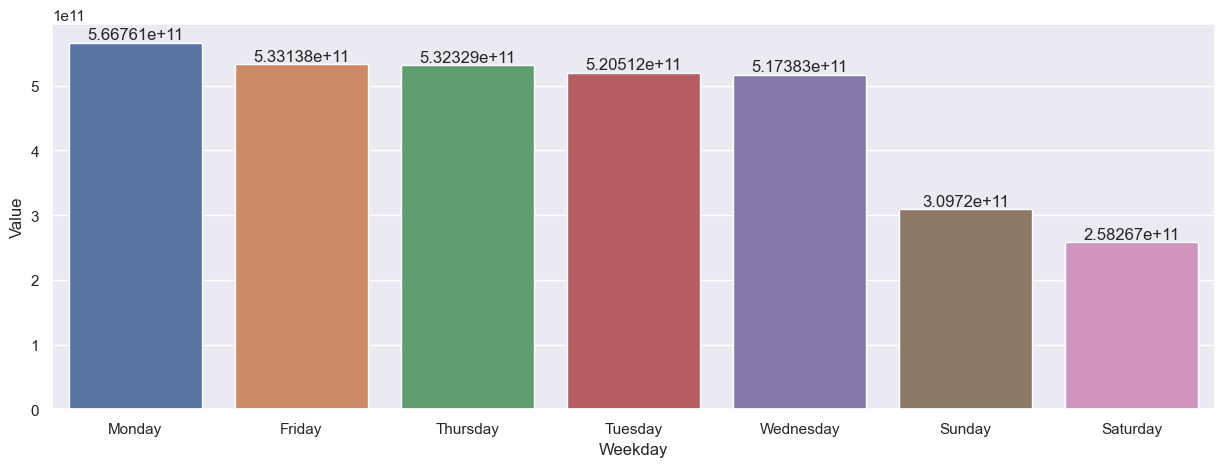

In [32]:
ad=df.groupby(['Weekday'],as_index=False)['Value'].sum().sort_values(by='Value',ascending=False)
ad
s=sns.barplot(x='Weekday',y='Value',data=ad)
sns.set(rc={'figure.figsize':(20,5)})
for bars in s.containers:
    s.bar_label(bars)

# groupby between weekday and cumulative

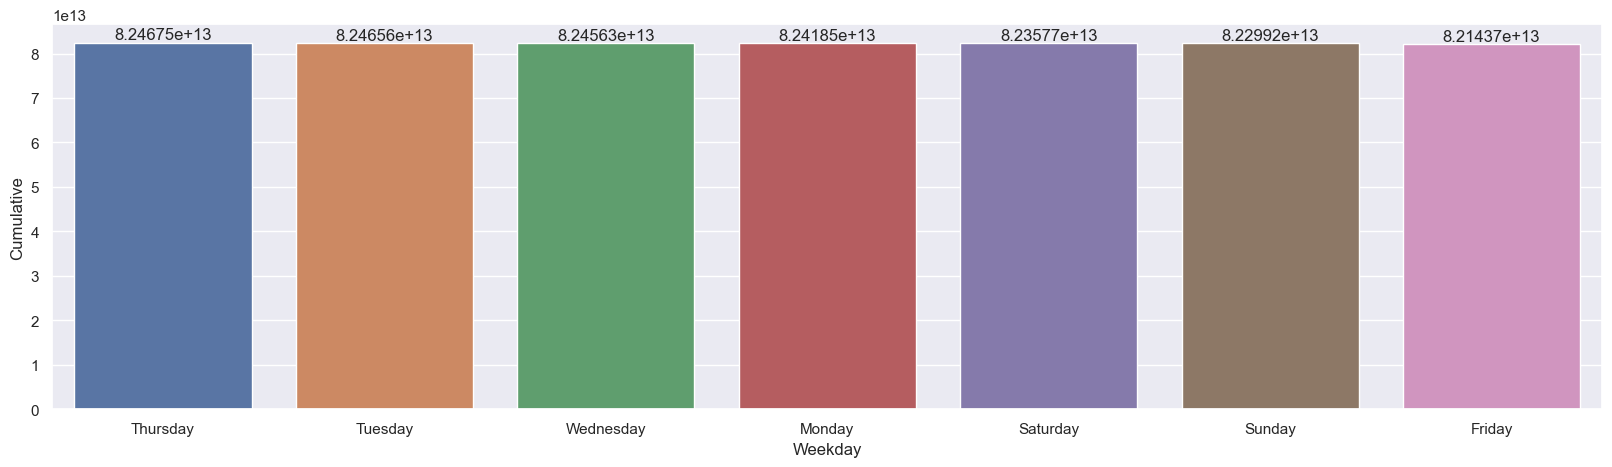

In [45]:
ctr=df.groupby(['Weekday'] ,as_index=False)['Cumulative'].sum().sort_values(by='Cumulative',ascending=False)
ctr
ds=sns.barplot(x='Weekday',y='Cumulative',data=ctr)
sns.set(rc={'figure.figsize':(20,10)})
for bars in ds.containers:
    ds.bar_label(bars)

# direction

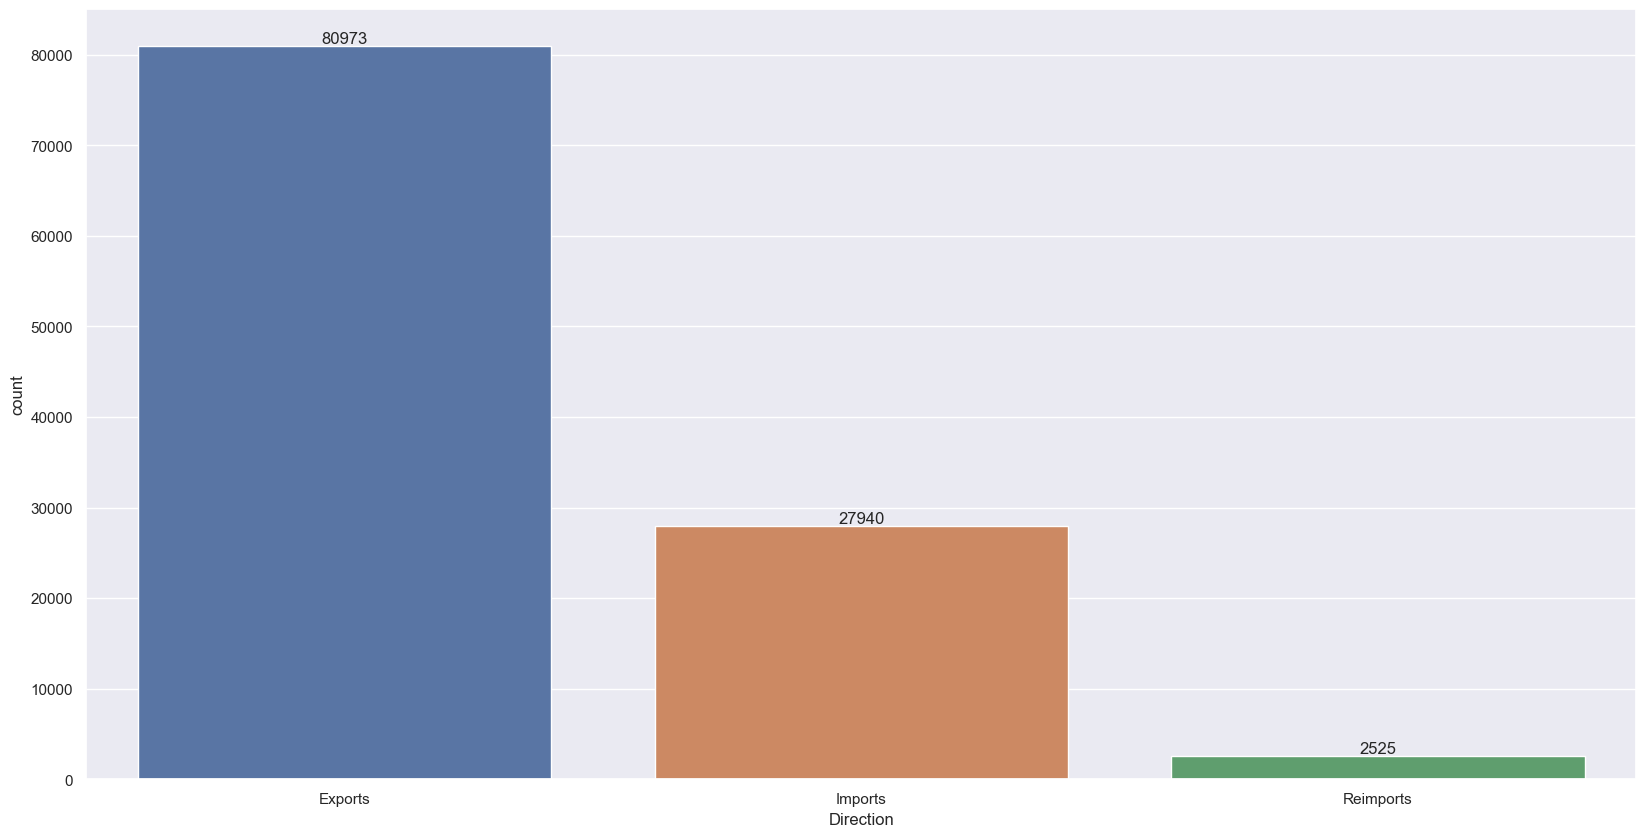

In [49]:
ax=sns.countplot(x='Direction',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [53]:
df.describe(include=object)

,Direction,Date,Weekday,Country,Commodity,Transport_Mode,Measure
count,111438,111438,111438,111438,111438,111438,111438
unique,3,2541,7,9,9,3,2
top,Exports,24/06/2018,Friday,All,All,All,$
freq,80973,44,15959,50801,45720,101274,88727


In [58]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())

Direction
['Exports' 'Imports' 'Reimports']
Date
['01/01/2015' '02/01/2015' '03/01/2015' ... '13/12/2021' '14/12/2021'
 '15/12/2021']
Weekday
['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Country
['All' 'China' 'Australia' 'United States' 'Japan' 'United Kingdom'
 'European Union (27)' 'East Asia (excluding China)'
 'Total (excluding China)']
Commodity
['All' 'Milk powder, butter, and cheese' 'Meat and edible offal'
 'Logs, wood, and wood articles' 'Fish, crustaceans, and molluscs' 'Fruit'
 'Non-food manufactured goods' 'Mechanical machinery and equip'
 'Electrical machinery and equip']
Transport_Mode
['All' 'Air' 'Sea']
Measure
['$' 'Tonnes']


Text(0.5, 1.0, 'year wise count')

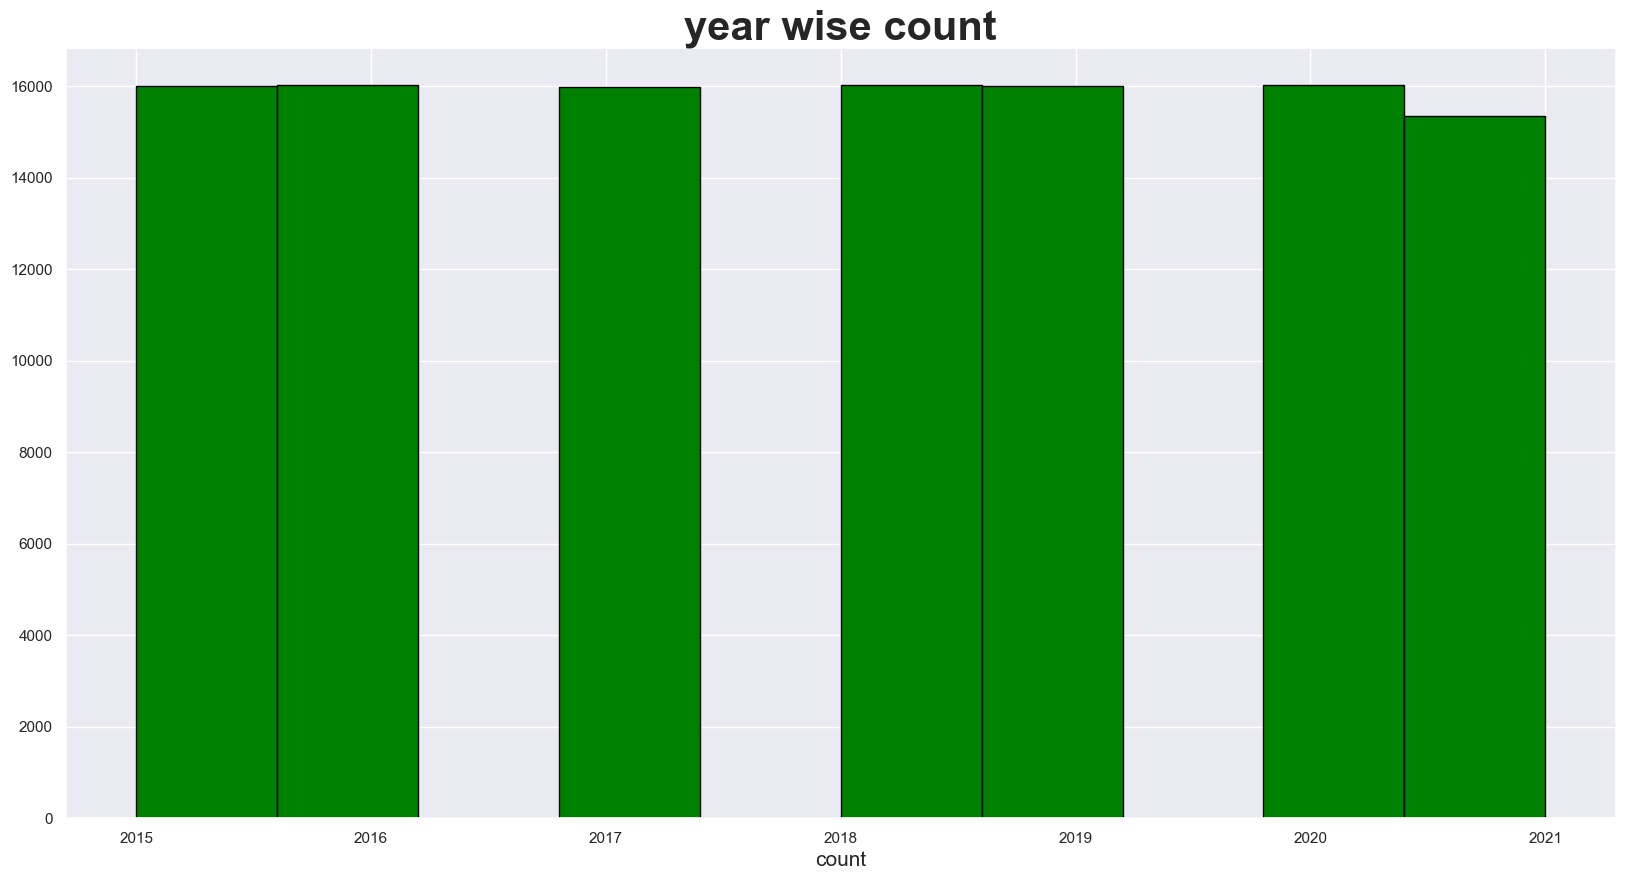

In [75]:
df['Year']=df['Year'].astype(str)
sd=df['Year']

plt.hist(sd ,edgecolor='black',color='green')
plt.xlabel('year',size=15)
plt.xlabel('count',size=15)
plt.title('year wise count',fontweight='bold',size=30)

([<matplotlib.patches.Wedge at 0x232e883d090>,
 [Text(-0.7186387542833816, 0.8328015014648027, 'Exports'),
  Text(0.6575874040721996, -0.8818042900811868, 'Imports'),
  Text(1.097214304738254, -0.07823534672863604, 'Reimports')],
 [Text(-0.39198477506366264, 0.45425536443534686, '72.661930322647095%'),
  Text(0.35868403858483616, -0.4809841582261018, '25.072237849235535%'),
  Text(0.5984805298572294, -0.042673825488346924, '2.265833877027035%')])

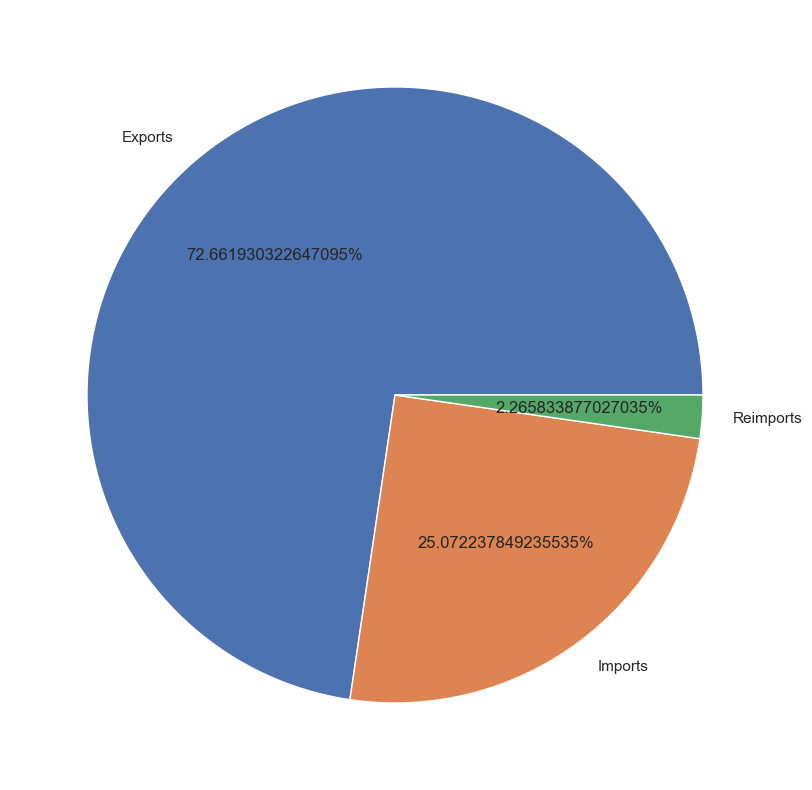

In [85]:
pdf=df['Direction'].value_counts()
pdf

plt.pie(pdf,labels=pdf.index,autopct='%.15f%%')

# CONCLUSION :

# All year has aroximately same income.In that income exorts gets high amount